In [1]:
import os
# import math
from itertools import repeat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  # if you need to view less rows, comment
# pd.set_option('display.max_rows', None)  # if you need to view more rows, uncomment
mean = 'mean'
std = 'std'
idx_slice = pd.IndexSlice

In [12]:
file_location = '/home/kmeador/SEC' # escher
# file_location = '/home/kylemeador' # powerpanda
file_name = '211110 T33_E1_elution_90ul_concentrated and E12'
file_name2 = '211112_T33_F6_90ul_elution_concentrated&F5'

In [13]:
extension = 'csv'
analysis_file = os.path.join(file_location, '%s.%s' % (file_name, extension))
analysis_file2 = os.path.join(file_location, '%s.%s' % (file_name2, extension))

In [22]:
# for datasets that are exported with volumes for every measurement
sec_data_df = pd.read_csv(analysis_file, header=[0,1])
# For datasets that are exported with normalize volumes
sec_data_df2 = pd.read_csv(analysis_file2, header=[0,1], index_col=0)

In [5]:
sec_data_df.head()

T33_E1_elution_90ul_concentrated                                       \
               UV1 (215 nm)_volume UV1 (215 nm)_mAU UV2 (255 nm)_volume   
0                        -0.997706            0.000           -0.997706   
1                        -0.996817            0.000           -0.996817   
2                        -0.995837            0.000           -0.995837   
3                        -0.994539            9.865           -0.994539   
4                        -0.993650            9.865           -0.993650   

                                                                             \
  UV2 (255 nm)_mAU UV3 (280 nm)_volume UV3 (280 nm)_mAU Conductivity_volume   
0              0.0           -0.997706              0.0           -0.997706   
1              0.0           -0.996817              0.0           -0.996817   
2              0.0           -0.995837              0.0           -0.995837   
3              0.0           -0.994539              0.0           -0.994539   
4              NaN           -0.993650              NaN           -0.993650   

                                                                       \
  Conductivity_mS/cm delta Col Pressure_volume delta Col Pressure_MPa   
0          25.818712                 -0.995427               0.041369   
1          25.818712                 -0.991075               0.034474   
2          25.818712                 -0.985242               0.068948   
3          25.818712                 -0.979408               0.186158   
4          25.817755                 -0.973575               0.324054   

                                   T33_E12_elution_0.9ul_concentrated  \
  Temperature_volume Temperature_C                UV1 (215 nm)_volume   
0          -0.997706      9.217049                          -0.997183   
1          -0.996817      9.217049                          -0.996021   
2          -0.995837      9.217049                          -0.995133   
3          -0.994539      9.217049                          -0.994198   
4          -0.993650      9.217049                          -0.992991   

                                                                             \
  UV1 (215 nm)_mAU UV2 (255 nm)_volume UV2 (255 nm)_mAU UV3 (280 nm)_volume   
0         0.000000           -0.997183              0.0           -0.997183   
1        65.886997           -0.996021              0.0           -0.996021   
2        65.886997           -0.995133              NaN           -0.995133   
3        65.886997           -0.994198              NaN           -0.994198   
4        65.886997           -0.992991              NaN           -0.992991   

                                                           \
  UV3 (280 nm)_mAU Conductivity_volume Conductivity_mS/cm   
0              0.0           -0.997183          26.274538   
1              0.0           -0.996021          26.274538   
2              NaN           -0.995133          26.274538   
3              NaN           -0.994198          26.274538   
4              NaN           -0.992991          26.274538   

                                                                       \
  delta Col Pressure_volume delta Col Pressure_MPa Temperature_volume   
0                 -0.994700               0.034474          -0.997183   
1                 -0.990507               0.041369          -0.996021   
2                 -0.984674               0.075842          -0.995133   
3                 -0.978840               0.199948          -0.994198   
4                 -0.973007               0.310264          -0.992991   

                 
  Temperature_C  
0     10.724861  
1     10.724861  
2     10.724861  
3     10.724861  
4     10.724861

In [23]:
sec_data_df2.head()

T33_F5_concentrated_elution_90ul                   \
X_Axis_volume                 UV1 (215 nm)_mAU UV3 (280 nm)_mAU   
-0.997114                             0.000000              0.0   
-0.996453                           -10.837888              0.0   
-0.995336                           -19.040000              NaN   
-0.994493                           -19.040000              NaN   
-0.993605                           -19.040000              NaN   

                                                                          \
X_Axis_volume UV4 (490 nm)_mAU Conductivity_mS/cm delta Col Pressure_MPa   
-0.997114                  0.0          20.031721                    NaN   
-0.996453                  0.0          20.031721                    NaN   
-0.995336                  NaN          20.031721                    NaN   
-0.994493                  NaN          20.031721               0.068948   
-0.993605                  NaN          20.031721               0.068948   

                            T33_F6_90ul_elution_concentrated                   \
X_Axis_volume Temperature_C                 UV1 (215 nm)_mAU UV2 (255 nm)_mAU   
-0.997114         10.224861                              NaN              NaN   
-0.996453         10.224861                         0.000000            0.000   
-0.995336         10.224861                       -23.552001           -1.729   
-0.994493         10.224861                       -23.552001           -1.729   
-0.993605         10.224861                       -23.552001           -1.729   

                                                                    \
X_Axis_volume UV3 (280 nm)_mAU UV4 (490 nm)_mAU Conductivity_mS/cm   
-0.997114                  NaN              NaN                NaN   
-0.996453                0.000            0.000          25.517071   
-0.995336               -5.079           -5.896          25.560137   
-0.994493               -5.079           -5.896          25.560137   
-0.993605               -5.079           -5.896          25.560137   

                                                    
X_Axis_volume delta Col Pressure_MPa Temperature_C  
-0.997114                        NaN           NaN  
-0.996453                        NaN      9.763924  
-0.995336                        NaN      9.763924  
-0.994493                        NaN      9.763924  
-0.993605                        NaN      9.763924

In [6]:
def split_biorad_chromatogram_dataframe_to_unique_runs(df):
    """From a DataFrame with multiple column headers representing unique SEC runs, extract each run as a separate DataFrame"""
    split_dfs = []
    for run in df.columns.levels[0].to_list():
        split_dfs.append(df.loc[:, idx_slice[run, :]])
    
    return split_dfs

In [7]:
def extract_volume_and_uv_columns_from_biorad_chromatogram(df):
    uv_columns = []
    volume = None
    for column in df.columns.levels[-1].to_list():
        if column.startswith('UV'):
            if column.endswith('_volume'):
                volume = column
            else:
                uv_columns.append(column)
                
    if volume:
        return volume, uv_columns
    else:
        return 

In [8]:
sec_runs = split_biorad_chromatogram_dataframe_to_unique_runs(sec_data_df)
# chromatogram_graph_data = [extract_volume_and_uv_columns_from_biorad_chromatogram(run_df) for run_df in sec_runs]

In [9]:
volume, uv_columns = chromatogram_graph_data[0]
print(volume, uv_columns)

UV3 (280 nm)_volume ['UV1 (215 nm)_mAU', 'UV2 (255 nm)_mAU', 'UV3 (280 nm)_mAU']


In [27]:
def plot_chromatograms(sec_runs, volume_is_column=False):
#     vol_idx, uv_idx = 0, 1
    for idx, run_df in enumerate(sec_runs):
        uv_columns = []
        volume = None
        for column in run_df.columns.levels[-1].to_list():
            if column.startswith('UV'):
                if column.endswith('_volume'):
                    volume = column
                else:
                    uv_columns.append(column)

        if volume_is_column and volume:      
            selected_columns = [volume] + uv_columns
        else:
            selected_columns = uv_columns
        
#         volume, uv_columns = chromatogram_graph_data[idx] # [vol_idx], chromatogram_graph_data[idx][uv_idx]
        formatted_df = run_df.loc[:, idx_slice[:, selected_columns]].droplevel(0, axis=1)
        # grab first level, first (and only index)
        # df_title = run_df.columns.levels[0].unique()  # Doesn't work as grabs old levels from original DF
        df_title = run_df.columns.get_level_values(0).unique()
        if len(df_title) != 1:
            print('Error, multiple headers detected in dataframe %s!\n%s' % (df_title, run_df.head()))
            break
        # formatted_df = formatted_df[formatted_df[volume] > 0.007]
        # format the volume as the dependent variable
        if volume_is_column:      
            formatted_df.index = formatted_df[volume]
            formatted_df.drop(volume, axis=1, inplace=True)
        formatted_df.index.name = 'Volume'
        
        # format column names to be pretty
        formatted_df.columns = formatted_df.columns.map(dict(zip(formatted_df.columns, 
            map(str.strip, 
                map(str.strip, 
                    map(str.replace, 
                        map(str.replace, formatted_df.columns, repeat('_mAU'), repeat('')),
                        repeat('UV'), repeat('')), 
                    repeat('1234567890 ')), 
                repeat('()')))))
        formatted_df.plot(title=df_title[0])
    
    plt.show()    

In [25]:
sec_runs2 = split_biorad_chromatogram_dataframe_to_unique_runs(sec_data_df2)
# chromatogram_graph_data2 = [extract_volume_and_uv_columns_from_biorad_chromatogram(run_df) for run_df in sec_runs2]

In [17]:
volume, uv_columns = chromatogram_graph_data2[0]
print(volume, uv_columns)

None ['UV1 (215 nm)_mAU', 'UV2 (255 nm)_mAU', 'UV3 (280 nm)_mAU', 'UV4 (490 nm)_mAU']


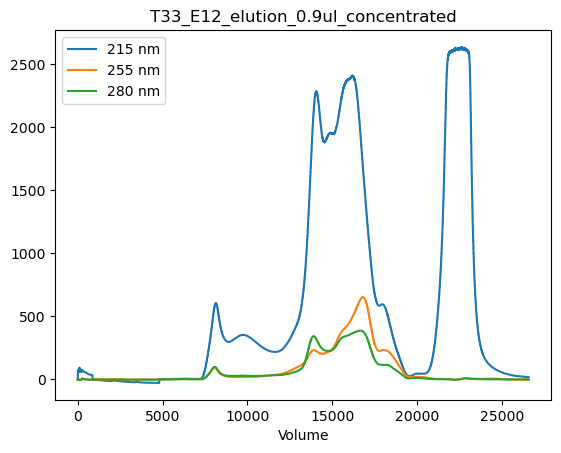

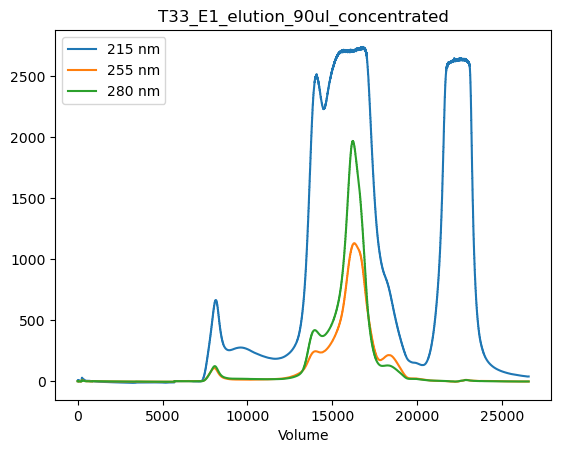

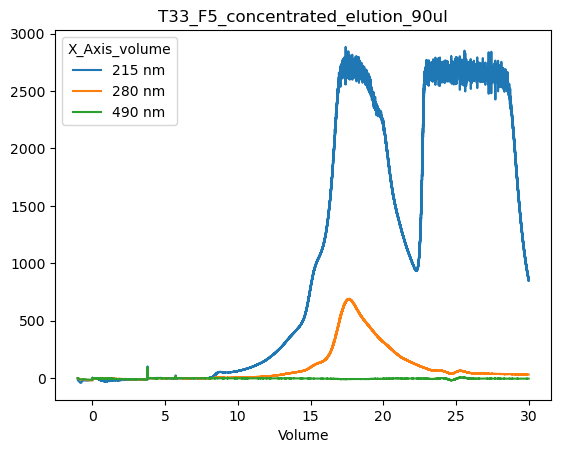

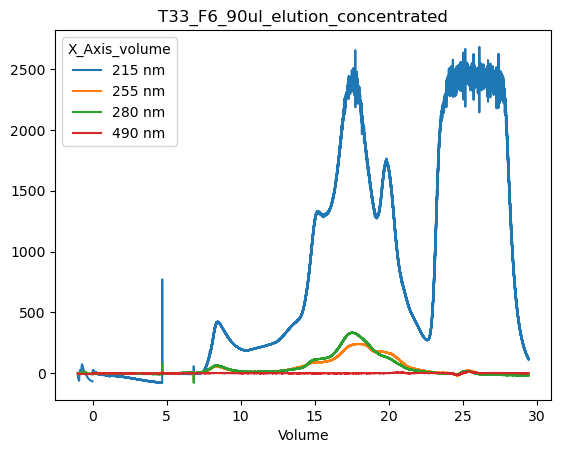

In [28]:
plot_chromatograms(sec_runs)
plot_chromatograms(sec_runs2)

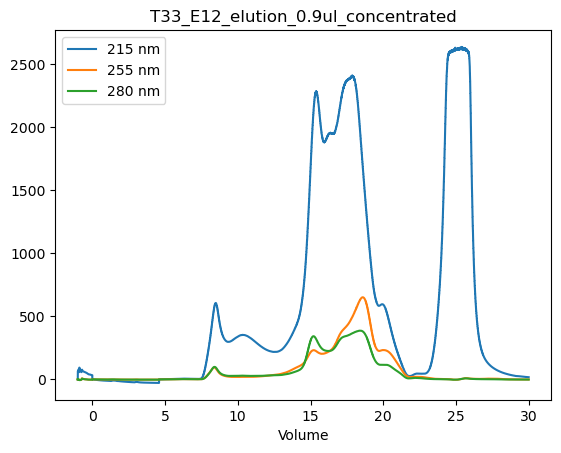

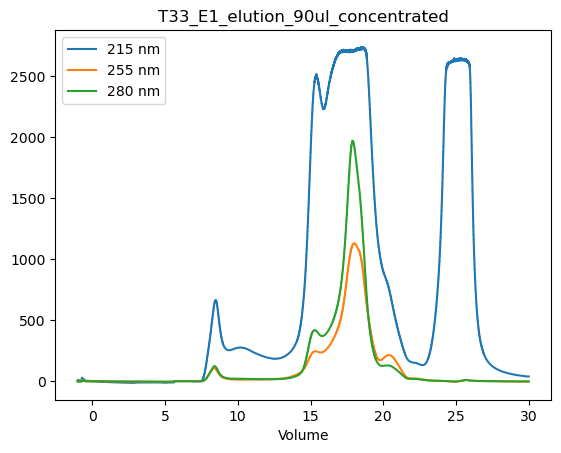

In [11]:
plt.show()

In [85]:
figure_aspect_ratio = (10, 4)
fig = plt.figure(figsize=figure_aspect_ratio)
uv_ax = fig.subplots(1, 1)
uv_ax.plot(formatted_df, ) # label='Contact Order', color='#fbc0cb', lw=1, linestyle='-'

In [86]:
fig.clear()